In [1]:
# Import essential libraries for data analysis and visualization
import pandas as pd  # For data manipulation
import numpy as np   # For numerical operations
import seaborn as sns  # For visualizations
import matplotlib.pyplot as plt  # For plotting
from scipy.stats import zscore  # For outlier detection using Z-scores

# Enable inline plotting in Jupyter
%matplotlib inline
# Load Benin dataset from the data folder (relative path from notebook/)
df = pd.read_csv('../data/togo-dapaong_qc.csv')

# Display the first 5 rows to understand the structure
df.head()
# Show the number of rows and columns in the dataset
print(f"Shape of the dataset: {df.shape}")




Shape of the dataset: (525600, 19)


In [2]:
# Print a concise summary of the dataframe including data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TModB          525600 non-nul

In [3]:
# Generate summary statistics for all numeric columns
df.describe()



,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,230.555040,151.258469,116.444352,226.144375,219.568588,27.751788,55.013160,2.368093,3.229490,0.557740,161.741845,10.559568,975.915242,0.000535,0.001382,32.444403,33.543330,NaN
std,322.532347,250.956962,156.520714,317.346938,307.932510,4.758023,28.778732,1.462668,1.882565,0.268923,91.877217,5.915490,2.153977,0.023116,0.026350,10.998334,12.769277,NaN
min,-12.700000,0.000000,0.000000,0.000000,0.000000,14.900000,3.300000,0.000000,0.000000,0.000000,0.000000,0.000000,968.000000,0.000000,0.000000,13.100000,13.100000,NaN
25%,-2.200000,0.000000,0.000000,0.000000,0.000000,24.200000,26.500000,1.400000,1.900000,0.400000,74.800000,6.900000,975.000000,0.000000,0.000000,23.900000,23.600000,NaN
50%,2.100000,0.000000,2.500000,4.400000,4.300000,27.200000,59.300000,2.200000,2.900000,0.500000,199.100000,10.800000,976.000000,0.000000,0.000000,28.400000,28.400000,NaN
75%,442.400000,246.400000,215.700000,422.525000,411.000000,31.100000,80.800000,3.200000,4.400000,0.700000,233.500000,14.100000,977.000000,0.000000,0.000000,40.600000,43.000000,NaN
max,1424.000000,1004.500000,805.700000,1380.000000,1367.000000,41.400000,99.800000,16.100000,23.100000,4.700000,360.000000,86.900000,983.000000,1.000000,2.300000,70.400000,94.600000,NaN


In [4]:
# Count missing values in each column
missing_counts = df.isna().sum()

# Calculate % of missing data in each column
missing_percent = (missing_counts / len(df)) * 100

# Combine into one DataFrame
missing_report = pd.DataFrame({
    'Missing Values': missing_counts,
    'Percent Missing': missing_percent
})

# Filter for columns with more than 5% missing
missing_report[missing_report['Percent Missing'] > 5]


,Missing Values,Percent Missing
Comments,525600,100.0


In [5]:
# Select columns of interest for Z-score outlier detection
z_columns = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

# Drop rows with missing values in those columns to avoid errors during z-score calculation
df_clean_z = df[z_columns].dropna()

# Calculate Z-scores for the selected columns
z_scores = np.abs(zscore(df_clean_z))

# Create a boolean mask where any Z-score > 3 is considered an outlier
outlier_mask = (z_scores > 3)

# Count how many outliers there are in each column
outlier_summary = pd.DataFrame(outlier_mask, columns=z_columns).sum()
outlier_summary


GHI        305
DNI       1062
DHI       3415
ModA       137
ModB       206
WS        3510
WSgust    3915
dtype: int64

In [6]:
# Impute missing numeric values with median of each column
df_imputed = df.copy()
for col in z_columns:
    if df_imputed[col].isna().sum() > 0:
        df_imputed[col].fillna(df_imputed[col].median(), inplace=True)

# Check if any missing values remain
df_imputed.isna().sum()


Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

In [7]:
# Combine the Z-score mask with the original DataFrame's indices
non_outliers_mask = (np.abs(zscore(df_imputed[z_columns])) < 3).all(axis=1)

# Create new cleaned DataFrame without outliers
df_cleaned = df_imputed[non_outliers_mask]

# Show shape before and after dropping outliers
print(f"Before outlier removal: {df_imputed.shape}")
print(f"After outlier removal: {df_cleaned.shape}")


Before outlier removal: (525600, 19)
After outlier removal: (516349, 19)


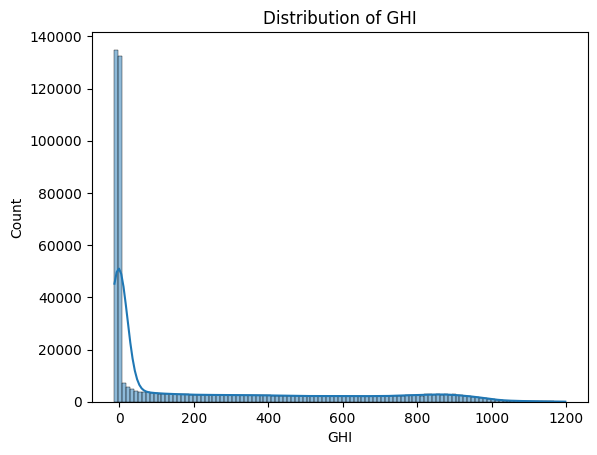

In [8]:
# Plot the distribution of GHI (Global Horizontal Irradiance)
sns.histplot(df_cleaned['GHI'], kde=True)
plt.title("Distribution of GHI")
plt.show()


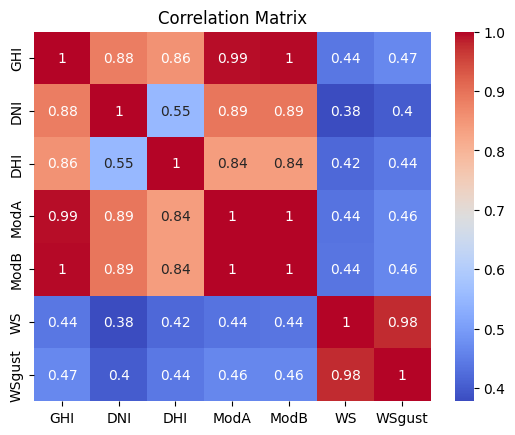

In [9]:
# Plot heatmap to see correlation between sensor features
sns.heatmap(df_cleaned[z_columns].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()
